In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
from tensorflow.keras.datasets import cifar10

In [34]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

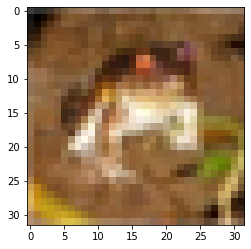

In [35]:
## Check out some of the images. 
plt.imshow(x_train[0])

In [36]:
## Map the values between 0 and 1.
x_train = x_train / 255
x_test = x_test / 255

In [37]:
from tensorflow.keras.utils import to_categorical

In [38]:
## Transform "y_train" and "y_test" to be categorical.
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [40]:
## Build the model.
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4, 4), input_shape = (32, 32, 3), activation = "relu"))

model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 32, kernel_size = (4, 4), input_shape = (32, 32, 3), activation = "relu"))

model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 1)

In [43]:
model.fit(x_train, y_cat_train, epochs = 15, validation_data = (x_test, y_cat_test), callbacks = [early_stop])

Epoch 1/15
1563/1563 [==============================] - 18s 12ms/step - loss: 1.4959 - accuracy: 0.4578 - val_loss: 1.2624 - val_accuracy: 0.5454
Epoch 2/15
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1600 - accuracy: 0.5892 - val_loss: 1.1086 - val_accuracy: 0.6084
Epoch 3/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0151 - accuracy: 0.6472 - val_loss: 1.0072 - val_accuracy: 0.6460
Epoch 4/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9010 - accuracy: 0.6854 - val_loss: 0.9464 - val_accuracy: 0.6750
Epoch 5/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8118 - accuracy: 0.7181 - val_loss: 0.9588 - val_accuracy: 0.6716


In [45]:
## Evaluate the model
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.495900,0.45776,1.262448,0.5454
1,1.159963,0.58922,1.108575,0.6084
2,1.015104,0.64720,1.007161,0.6460
3,0.901048,0.68540,0.946424,0.6750
4,0.811784,0.71810,0.958788,0.6716


<AxesSubplot:>

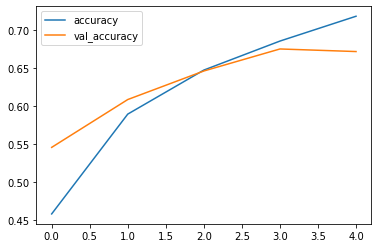

In [46]:
metrics[["accuracy", "val_accuracy"]].plot()

<AxesSubplot:>

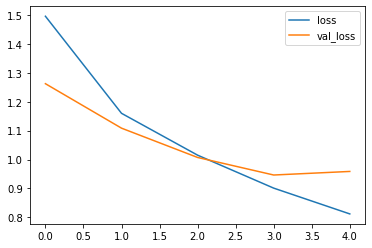

In [47]:
metrics[["loss", "val_loss"]].plot()

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
predictions = model.predict_classes(x_test)
print(classification_report(y_test, predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1000
           1       0.81      0.77      0.79      1000
           2       0.65      0.48      0.55      1000
           3       0.51      0.47      0.49      1000
           4       0.52      0.74      0.61      1000
           5       0.65      0.51      0.57      1000
           6       0.69      0.80      0.74      1000
           7       0.78      0.68      0.73      1000
           8       0.69      0.84      0.76      1000
           9       0.73      0.75      0.74      1000

    accuracy                           0.67     10000
   macro avg    

<AxesSubplot:>

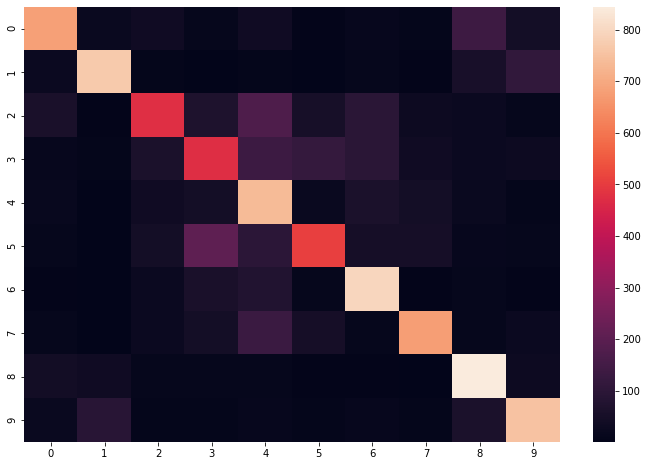

In [51]:
import seaborn as sns

plt.figure(figsize = (12, 8))
sns.heatmap(confusion_matrix(y_test, predictions))

array([3])

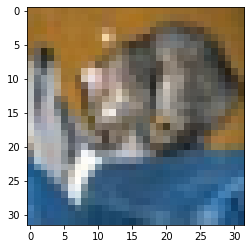

In [56]:
## Test the model on an image.
test_img = x_test[0]
plt.imshow(test_img)
model.predict_classes(test_img.reshape(1, 32, 32, 3))